# Program II: Benchmarking Insertion and Selection Sorts
### By: Drew Mattson, Ian Czerkis, Akashdeep Gill
## Introduction

In [7]:
import copy
import time
import random
import matplotlib.pyplot as plt

# Sorting Algorithms
## Insertion Sort

In [8]:
def insertion_sort(lst):
    size = len(lst)
    # iterate from index 1 to array length
    for j in range(1, size):
        key = lst[j]
        i = j - 1
        # shift elements to appropriate spots if necessary
        while i >= 0 and lst[i] > key:
            lst[i+1] = lst[i]
            i = i - 1
        # place key in its appropriate sorted position
        lst[i+1] = key


## Selection Sort

In [9]:
def selection_sort(lst):
    size = len(lst)
    for ind in range(size):
        min_index = ind
 
        for j in range(ind + 1, size):
            # select the minimum element in every iteration
            if lst[j] < lst[min_index]:
                min_index = j
         # swap the elements to sort the array
        (lst[ind], lst[min_index]) = (lst[min_index], lst[ind])

## Correctness Testing

In [10]:
original_tests_cases = [
    ([3, 2, 1], [1, 2, 3]),
    ([1, 2, 3], [1, 2, 3]),
    ([1, 8, 7, 9, 2, 4, 10, 5, 6, 3], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
    ([492, 215, 761, 38, 904, 127, 589, 333, 674, 51], [38, 51, 127, 215, 333, 492, 589, 674, 761, 904]),
    ([724, 138, 502, 891, 267, 605, 49, 803, 416, 175], [49, 138, 175, 267, 416, 502, 605, 724, 803, 891]),
    ([0.587, 0.231, 0.895, 0.412, 0.674, 0.138, 0.759, 0.523, 0.946, 0.301], [0.138, 0.231, 0.301, 0.412, 0.523, 0.587, 0.674, 0.759, 0.895, 0.946]),
    ([-55, 72, -18, 41, -93, 7, 64, -29, 15, -84], [-93, -84, -55, -29, -18, 7, 15, 41, 64, 72])
]

def get_deep_copy_of_test_cases():
    return copy.deepcopy(original_tests_cases)

# Benchmarking
## Set Up Benchmarks

In [11]:
algorithms = [selection_sort, insertion_sort]
# benchmark_sizes = [10, 100, 1000, 10000]
benchmark_sizes = [10, 100, 1000, 10000, 100000]
benchmark_cases = ['sorted', 'random', 'reversed']

def generate_random_list(size, case):
    if case == 'random':
        return random.sample(range(1, size + 1), size)
    elif case == 'sorted':
        return list(range(1, size + 1))
    elif case == 'reversed':
        return list(range(size, 0, -1))

def benchmark(sorting_algorithm, lst):
    # set up
    copy_lst = copy.deepcopy(lst)
    start_time = time.perf_counter()
    # sort
    sorting_algorithm(copy_lst)
    # tear down
    end_time = time.perf_counter()
    return end_time - start_time

def benchmark_algorithms():
    results = {}
    for size in benchmark_sizes:
        for case in benchmark_cases:
            lst = generate_random_list(size, case)
            for algorithm in algorithms:
                key = (algorithm.__name__, size, case)
                # print(f'Benchmarking {key}')
                results[key] = benchmark(algorithm, lst)
    
    return results

def plot_benchmark():
    results = benchmark_algorithms()

    insertion_sort_colors = ['steelblue', 'cornflowerblue', 'royalblue']
    selection_sort_colors = ['lightcoral', 'indianred', 'darkred']

    for i, case in enumerate(benchmark_cases):
        # Plot insertion_sort
        insertion_sort_data = [(size, results[('insertion_sort', size, case)]) for size in benchmark_sizes]
        plt.plot([size for size, _ in insertion_sort_data], [sort_time for _, sort_time in insertion_sort_data],
                 label=f'insertion_sort - {case}', color=insertion_sort_colors[i])

        # Plot selection_sort
        selection_sort_data = [(size, results[('selection_sort', size, case)]) for size in benchmark_sizes]
        plt.plot([size for size, _ in selection_sort_data], [sort_time for _, sort_time in selection_sort_data],
                 label=f'selection_sort - {case}', color=selection_sort_colors[i])

    # Add labels and legend
    plt.xlabel('List Size')
    plt.ylabel('Algorithm Execution Time')
    plt.title('Algorithm Benchmarking')
    plt.legend()

    # Show the plot
    plt.show()

## Run Benchmark

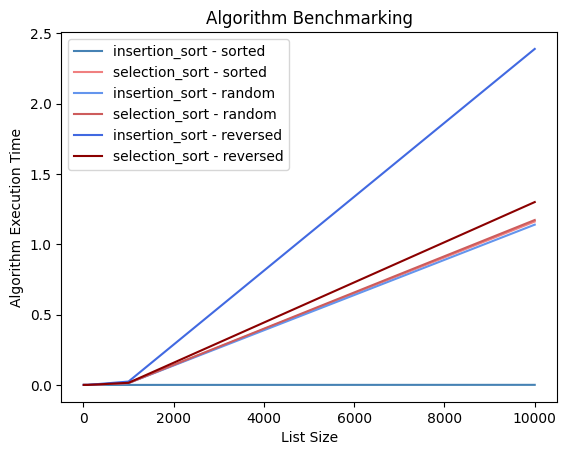

In [12]:
plot_benchmark()

# Reflection
## Theoretical vs Measured Algorithm Performance
| Algorithm          | Case     | Theoretical Run Time   | Estimated Run Time   |
|-------------------- |----------|-------------------------|----------------------|
| Insertion Sort      | Best     | O(n)                    | O(n)                 |
| Insertion Sort      | Average  | O(n^2)                  | O(n^2)               |
| Insertion Sort      | Worst    | O(n^2)                  | O(n^2)               |
| Selection Sort      | Best     | O(n^2)                  | O(n^2)               |
| Selection Sort      | Average  | O(n^2)                  | O(n^2)               |
| Selection Sort      | Worst    | O(n^2)                  | O(n^2)               |

## Case by Case Analysis
Algorithm Performance:

For best and average cases, Insertion Sort is expected to perform better as it has linear time complexity in the best case.
In the worst case, both algorithms have the same quadratic time complexity, so their performance should be comparable.
Inner Loop Consideration:

Insertion Sort is generally more efficient in practice for small datasets and already partially sorted data due to its adaptive nature.
Selection Sort's inner loop involves finding the minimum element and swapping, which is inherently less efficient than the comparisons in Insertion Sort.
Practical Usage:


## Overall Analysis
In conclusion, the choice between the two sorting algorithms depends on the specific use case, dataset size, and the nature of the data. In practical scenarios, considering other sorting algorithms with better average-case time complexity might be more beneficial.